In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("H:\SMS-Spam-Classification-master\data\spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])#encoding categorical data
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
y = data['v1'].as_matrix()
X_text = data['v2'].as_matrix() 
print(X_text.shape)
print(y.shape)

(5572,)
(5572,)


C:\Users\Prateek\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Prateek\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
sw = stopwords.words("english")
cv = CountVectorizer(stop_words =sw)
tcv = cv.fit_transform(X_text).toarray()
#print(cv.vocabulary_)
print(len(tcv[0,:]))

8536


In [12]:
print(tcv.shape)
print(y.shape)

(5572, 8536)
(5572,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
X = vectorizer.fit_transform(X_text).toarray()
print(X.shape)
print(y.shape)

(5572, 8536)
(5572,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.202, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
y_test.shape

(4446, 8536)
(4446,)
(1126, 8536)


(1126,)

In [14]:
#Applying various algorithms


In [17]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9440497335701599

In [18]:

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.8854351687388987

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(500,500))
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9795737122557726

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9706927175843695

In [21]:
from sklearn.svm import SVC
clf = SVC(gamma=0.1,C=1,kernel='rbf')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9484902309058615

In [15]:
n_classes = 2
y_n_train = np.zeros((y_train.size,n_classes)).astype(int)
print(y_n_train.shape)
k = 0

for i in y_train:
    y_n_train[k,i] = 1
    k+=1
print(y_n_train)

(4446, 2)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


C:\Users\Prateek\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch 0 completed out of 25 loss: 26.5550037920475
Epoch 1 completed out of 25 loss: 21.104535967111588
Epoch 2 completed out of 25 loss: 17.047267481684685
Epoch 3 completed out of 25 loss: 11.202954530715942
Epoch 4 completed out of 25 loss: 9.627198338508606
Epoch 5 completed out of 25 loss: 10.271875012665987
Epoch 6 completed out of 25 loss: 8.446212146431208
Epoch 7 completed out of 25 loss: 10.304999478161335
Epoch 8 completed out of 25 loss: 8.689982235431671
Epoch 9 completed out of 25 loss: 8.757400516420603
Epoch 10 completed out of 25 loss: 8.02880590595305
Epoch 11 completed out of 25 loss: 7.648086734116077
Epoch 12 completed out of 25 loss: 6.2765250243246555
Epoch 13 completed out of 25 loss: 5.927545724436641
Epoch 14 completed out of 25 loss: 5.307248460128903
Epoch 15 completed 

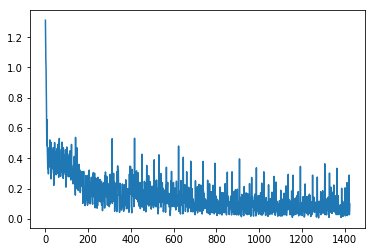

In [16]:
import tensorflow as tf
from tensorflow.contrib import rnn
epochs = 25
n_classes = 2
batch_size = 78
chunk_size = 97
n_chunks = 88
rnn_size = 78
x = tf.placeholder('float',[None,n_chunks,chunk_size])
y = tf.placeholder('float')
#from tensorflow.python.ops import rnn, rnn_cell
def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size,n_classes])),
             'biases':tf.Variable(tf.random_normal([n_classes]))}

    x = tf.unstack(x, n_chunks, 1)
    #print x.shape
    lstm_cell = rnn.BasicLSTMCell(rnn_size, forget_bias=1.0)

    # Get lstm cell's output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output

def train_neural_network(x):
    prediction = recurrent_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_history=[]
        for epoch in range(epochs):
            epoch_loss = 0
            i = 0
            while i<len(X_train):
                start = i
                end = i + batch_size
                #print(start,end)
                epoch_x, epoch_y = X_train[start:end],y_n_train[start:end]
                epoch_x = epoch_x.reshape((batch_size,n_chunks,chunk_size))
                #print epoch_x.shape
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                loss_history.append(c)
                epoch_loss += c
                i += batch_size

            print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_train.reshape((-1, n_chunks, chunk_size)), y:y_n_train}))
        plt.plot(loss_history)
        plt.show()
        #pred = sess.run(prediction,feed_dict={x:X_test.reshape((-1, n_chunks, chunk_size))})
        #corr = tf.argmax(pred,1)
        #corr = sess.run(corr)
        #print(corr)
        #k = [i+1 for i in range(len(corr))]
        #yg = pd.DataFrame({'ImageId':pd.Series(k),'Label':pd.Series(corr)})
        #yg.to_csv('ans.csv',index=False)
train_neural_network(x)
